In [1]:
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
from matplotlib import figure as fig
import matplotlib.lines as mlines
from functions import kwikplt

fp = "langs_by_county.csv"
csv_df = pd.read_csv(fp)
csv_df.sort_values('population')

,fips,county,state code,county code,population,no_french,pct_french,no_spanish,pct_spanish,no_chinese,pct_chinese
2,4017,"Navajo County, AZ",4,17,107322,85,0.079201,5885,5.483498,0,0.000000
100,35045,"San Juan County, NM",35,45,126503,205,0.162051,12025,9.505703,45,0.035572
49,15009,"Maui County, HI",15,9,160202,740,0.461917,2750,1.716583,210,0.131085
47,15001,"Hawaii County, HI",15,1,190821,625,0.327532,4440,2.326788,250,0.131013
25,6113,"Yolo County, CA",6,113,204593,605,0.295709,40085,19.592557,3385,1.654504
...,...,...,...,...,...,...,...,...,...,...,...
15,6073,"San Diego County, CA",6,73,3211252,9135,0.284468,725295,22.586051,27495,0.856208
1,4013,"Maricopa County, AZ",4,13,4009412,10680,0.266373,733630,18.297696,13750,0.342943
139,48201,"Harris County, TX",48,201,4336853,15510,0.357633,1313020,30.275871,28485,0.656813
50,17031,"Cook County, IL",17,31,5240700,18265,0.348522,991495,18.919133,39185,0.747705


In [2]:
pop = csv_df['population']
spanish = csv_df['pct_spanish']
french = csv_df['pct_french']
chinese = csv_df['pct_chinese']

Line Equation: y = 3.7694376310797385e-06*X+8.975812684070291
R-Squared: 0.4055249056933315
P-value: 1.6538849422156295e-07


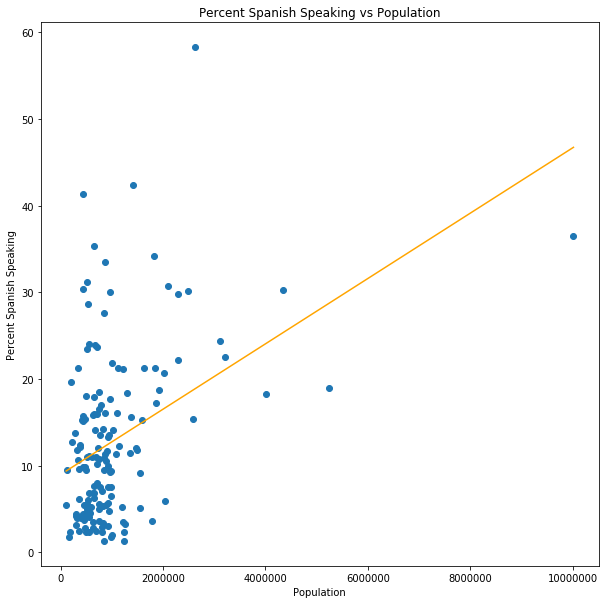

In [8]:
'''
kwikplot documentation
Inputs:
    pop: list or series of populations
    lan: list or series of language spears as a percent of population
Algorigthm:
    runs linear regression
    sets min and max population (x coordinates)
    sets min and max percentages (y coordinates)
    creates line element from min and max x and y coordinates
    plots scatter from pop and lan list
    plots line element
Returns
    None: None
'''
fig, ax = plt.subplots(figsize=(10,10))
kwikplt(pop,spanish)
plt.ticklabel_format(style='plain',axis='x')
plt.xlabel("Population")
plt.ylabel("Percent Spanish Speaking")
plt.title("Percent Spanish Speaking vs Population")
plt.savefig("PercentSpanishSpeakingVs.png")

In [3]:
state_df = csv_df.groupby('state code').sum()
#Floor division prevents millions of data points in calculating line
state_pop = list(state_df['population'])
state_spanish = state_df['no_spanish']/state_pop*100
state_french = state_df['pct_french']
state_chinese = state_df['pct_chinese']

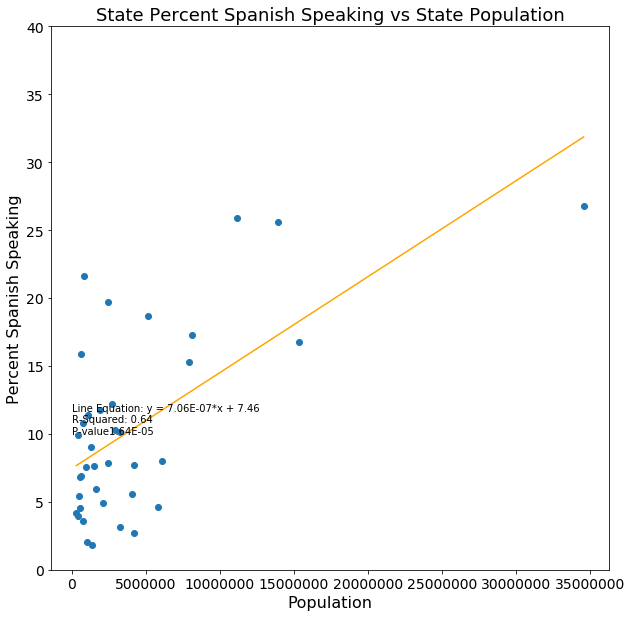

In [4]:
fig, ax = plt.subplots(figsize=(10,10))

kwikplt(state_pop,state_spanish)
plt.ylim(0,40)
plt.ticklabel_format(style='plain',axis='x')
plt.xlabel("Population", fontsize=16)
plt.ylabel("Percent Spanish Speaking", fontsize=16)
plt.tick_params('both', labelsize=14)
plt.title("State Percent Spanish Speaking vs State Population",fontsize=18)
plt.savefig("VsStatePop.png")
plt.show()

Line Equation: y = -0.029161058202766866*X+11.175035947813962
R-Squared: -0.06368816048150067
P-value: 0.7040408862119564


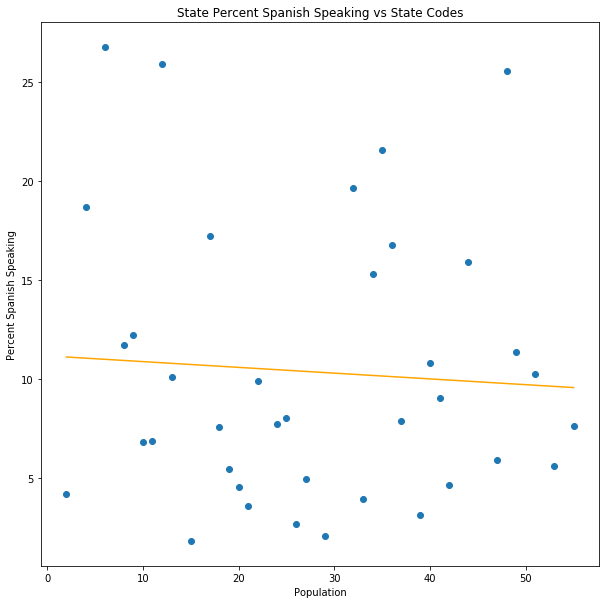

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
state_codes = state_df.index
kwikplt(state_codes,state_spanish)
plt.ticklabel_format(style='plain',axis='x')
plt.xlabel("Population")
plt.ylabel("Percent Spanish Speaking")
plt.title("State Percent Spanish Speaking vs State Codes")
plt.savefig("VsStateCodes.png")
plt.show()